In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("TMDB_movie_dataset_cleaned.csv")

In [5]:
print(df.head())

       id                 title  vote_average  vote_count    status  \
0  245891             John Wick         7.421       17923  Released   
1  244786              Whiplash         8.381       13891  Released   
2  264660            Ex Machina         7.572       12362  Released   
3  398818  Call Me by Your Name         8.167       11367  Released   
4  242582          Nightcrawler         7.703       10032  Released   

  release_date   revenue  runtime  adult                     backdrop_path  \
0   2014-10-22  88761661      101  False  /7dzngS8pLkGJpyeskCFcjPO9qLF.jpg   
1   2014-10-10  13092000      107  False  /vNXGrknx4GjWLgmuNTftWZluIUl.jpg   
2   2015-01-21  36869414      108  False  /uqOuJ50EtTj7kkDIXP8LCg7G45D.jpg   
3   2017-09-01  43143046      132  False  /zvOJawrnmgK0sL293mOXOdLvTXQ.jpg   
4   2014-10-23  50300000      118  False  /wofhl2lsTYCPmMQPsbj6iu9n0P6.jpg   

   ...        original_title  \
0  ...             John Wick   
1  ...              Whiplash   
2  ...  

In [ ]:
'''
3 Plots to be made:
  1. Visualise long vs short titles (by word count 3)
  2. long vs short runtimes (90 minutes)
  3. What Themes are the most popular?
'''

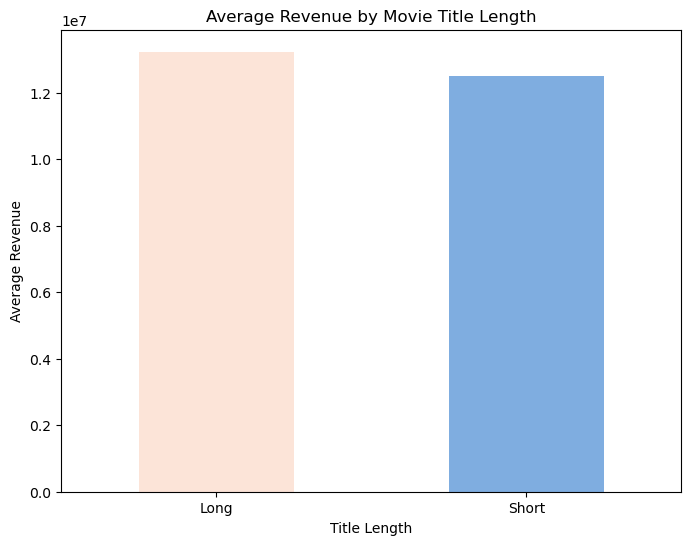

In [45]:
# long vs short titles

# Add a column to classify titles as 'Short' or 'Long'
df['title_length'] = df['title'].apply(lambda x: 'Short' if len(x.split()) <= 3 else 'Long')

# Calculate average revenue for each title length category
revenue_by_title_length = df.groupby('title_length')['revenue'].mean()

# Plot the data
plt.figure(figsize=(8, 6))
revenue_by_title_length.plot(kind='bar', color=['#fce4d8', '#7fade0'])
plt.title('Average Revenue by Movie Title Length')
plt.xlabel('Title Length')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.show()

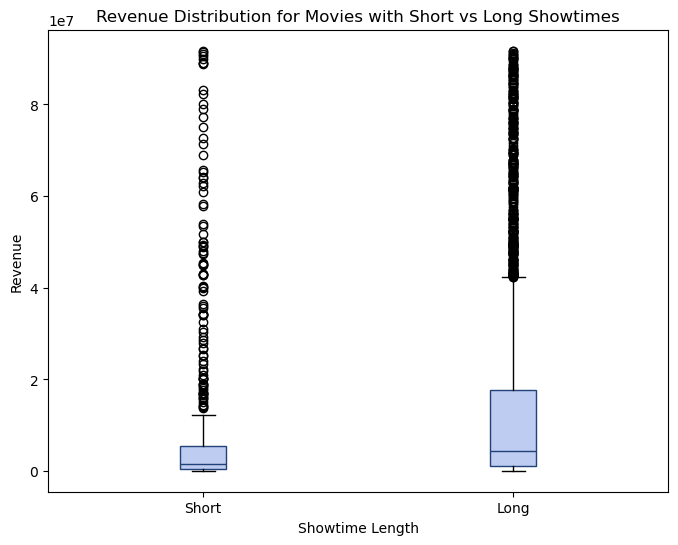

In [57]:
# Long showtimes vs short showtimes
# Define showtime categories
df['showtime_length'] = df['runtime'].apply(lambda x: 'Short' if x <= 90 else 'Long')

# Prepare data for boxplot
short_revenue = df[df['showtime_length'] == 'Short']['revenue']
long_revenue = df[df['showtime_length'] == 'Long']['revenue']

# Plot using matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot([short_revenue.dropna(), long_revenue.dropna()], labels=['Short', 'Long'], patch_artist=True, 
            boxprops=dict(facecolor='#BDCCF0', color='#214279'), 
            medianprops=dict(color='#214279'))

# Adding titles and labels
plt.title('Revenue Distribution for Movies with Short vs Long Showtimes')
plt.xlabel('Showtime Length')
plt.ylabel('Revenue')

plt.show()

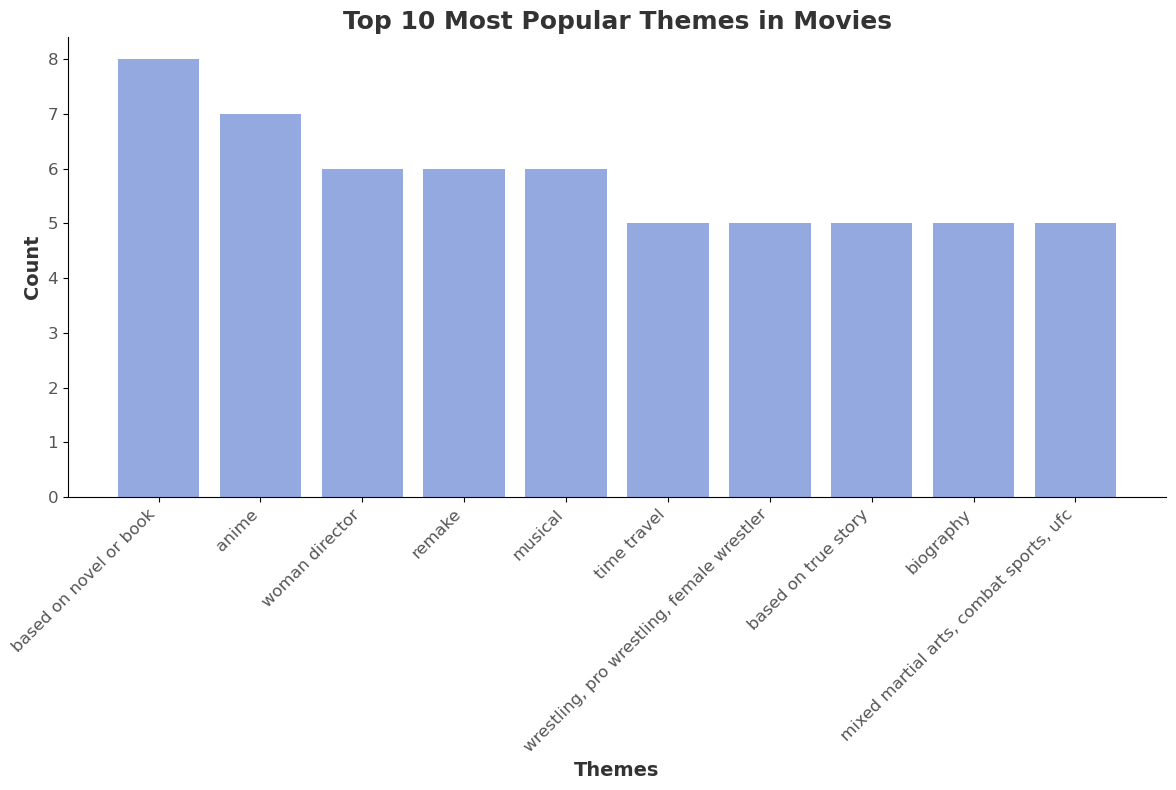

In [55]:
# Themes vs Popularity
# Split and count themes (assuming the 'keywords' column contains themes)
themes = df['keywords'].dropna().str.split('|').explode()  # Adjust separator if different
theme_counts = themes.value_counts().head(10)  # Get the top 10 most common themes

# Plot the data
plt.figure(figsize=(12, 8))
bars = plt.bar(theme_counts.index, theme_counts.values, color='#93a9df')

# Customizing titles and labels
plt.title('Top 10 Most Popular Themes in Movies', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Themes', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#333333')

# Rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Removing the top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()